In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeFez
from qiskit_ibm_runtime import QiskitRuntimeService

In [39]:
aer_backend = Aer.get_backend('qasm_simulator')
ibm_fake_backend = FakeFez()
ibm_quantum_backend = QiskitRuntimeService().least_busy(simulator=False, operational=True)

In [20]:
# Not Gate
def NOT_Gate():
    qc = QuantumCircuit(1, name="Not Gate")
    qc.x(0)
    print("Classical NOT Gate Circuit")
    display(qc.draw('mpl'))
    return qc

In [27]:
# AND Gate
def AND_Gate():
    qc = QuantumCircuit(3, name="AND Gate")
    qc.ccx(0, 1, 2)
    print("Classical AND Gate Circuit")
    display(qc.draw('mpl'))
    return qc

In [28]:
# OR Gate
def OR_Gate():
    qc = QuantumCircuit(3, name="OR Gate")
    qc.x(0)
    qc.x(1)
    qc.ccx(0, 1, 2)
    qc.x(2)
    qc.x(0)
    qc.x(1)
    print("Classical OR Gate Circuit")
    display(qc.draw('mpl'))
    return qc

In [29]:
# XOR Gate
def XOR_Gate():
    qc = QuantumCircuit(3, name="XOR Gate")
    qc.cx(0, 2)
    qc.cx(1, 2)
    print("Classical XOR Gate Circuit")
    display(qc.draw('mpl'))
    return qc

In [21]:
# Run on Aer Simulator
def aer_simulater(qc):
    display(qc.draw('mpl'))
    qc_t = transpile(qc, aer_backend)
    result = aer_backend.run(qc_t, shorts=1024).result()
    count = result.get_counts()
    print("Aer Simulator Measurement Result: ", count)

In [24]:
def ibm_fake_simulator(qc):
    qc_t = transpile(qc, backend=ibm_fake_backend)
    sampler = Sampler(mode=ibm_fake_backend)
    job = sampler.run([qc_t], shots=1024)
    result = job.result()

    pub_result = result[0]
    reg_name = list(pub_result.data.keys())[0]
    bit_array = pub_result.data[reg_name]

    counts = bit_array.get_counts()
    print("IBM Fake Simulator Measurement Result: ", counts)

In [42]:
def ibm_quantum_hardware(qc):
    qc_t = transpile(qc, backend=ibm_quantum_backend)
    sampler = Sampler(mode=ibm_quantum_backend)
    job = sampler.run([qc_t], shots=1024)
    result = job.result()

    pub_result = result[0]
    reg_name = list(pub_result.data.keys())[0]
    bit_array = pub_result.data[reg_name]

    counts = bit_array.get_counts()
    print("IBM Quantum Hardware Measurement Result: ", counts)

Classical NOT Gate Circuit


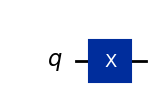

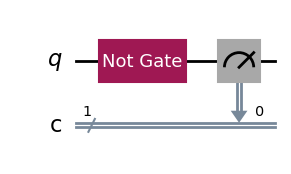

Aer Simulator Measurement Result:  {'1': 1024}
IBM Fake Simulator Measurement Result:  {'1': 1021, '0': 3}
IBM Quantum Hardware Measurement Result:  {'1': 1022, '0': 2}


In [43]:
qc_not = QuantumCircuit(1, 1)
qc_not.append(NOT_Gate().to_gate(), [0])
qc_not.measure(0, 0)
aer_simulater(qc_not)
ibm_fake_simulator(qc_not)
ibm_quantum_hardware(qc_not)

Classical AND Gate Circuit


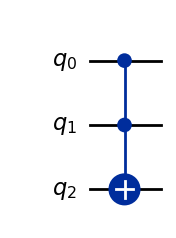

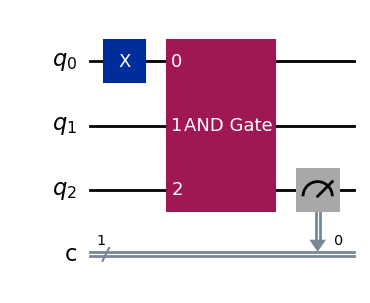

Aer Simulator Measurement Result:  {'0': 1024}
IBM Fake Simulator Measurement Result:  {'0': 1011, '1': 13}
IBM Quantum Hardware Measurement Result:  {'0': 1007, '1': 17}


In [44]:
qc_and = QuantumCircuit(3, 1)
qc_and.x(0)
qc_and.append(AND_Gate().to_gate(), [0, 1, 2])
qc_and.measure(2, 0)
aer_simulater(qc_and)
ibm_fake_simulator(qc_and)
ibm_quantum_hardware(qc_and)

Classical OR Gate Circuit


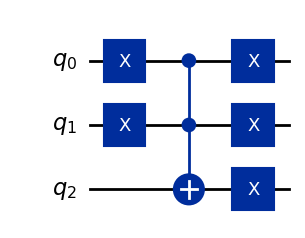

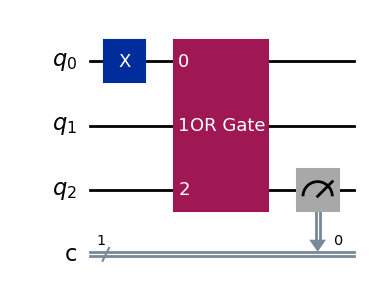

Aer Simulator Measurement Result:  {'1': 1024}
IBM Fake Simulator Measurement Result:  {'1': 999, '0': 25}
IBM Quantum Hardware Measurement Result:  {'1': 958, '0': 66}


In [45]:
qc_or = QuantumCircuit(3, 1)
qc_or.x(0)
qc_or.append(OR_Gate().to_gate(), [0, 1, 2])
qc_or.measure(2, 0)
aer_simulater(qc_or)
ibm_fake_simulator(qc_or)
ibm_quantum_hardware(qc_or)

Classical XOR Gate Circuit


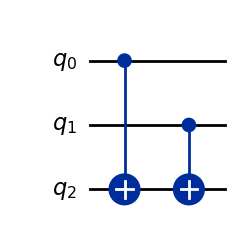

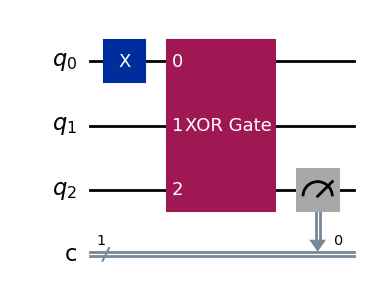

Aer Simulator Measurement Result:  {'1': 1024}
IBM Fake Simulator Measurement Result:  {'1': 1021, '0': 3}
IBM Quantum Hardware Measurement Result:  {'1': 992, '0': 32}


In [46]:
qc_xor = QuantumCircuit(3, 1)
qc_xor.x(0)
qc_xor.append(XOR_Gate().to_gate(), [0, 1, 2])
qc_xor.measure(2, 0)
aer_simulater(qc_xor)
ibm_fake_simulator(qc_xor)
ibm_quantum_hardware(qc_xor)